### 베이스코드 다시한번 뜯어보자!

In [70]:
# from tensorflow.keras.models import load_model
# import tensorflow as tf
# from utils.Dataloader import load_ratings

# #협업 필터링용 패키지
# from utils import Dataloader
# import tensorflow as tf
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import Embedding, Flatten
# from sklearn.model_selection import train_test_split

In [71]:
# #모델 파이프라인 생성
# def mf_model(user_dim, item_dim, K):
#     user = Input((1,))
#     item = Input((1,))
#     u_emb = Embedding(user_dim, K, name='u_emb')(user)
#     i_emb = Embedding(item_dim, K, name='i_emb')(item)

#     R = tf.keras.layers.dot([u_emb, i_emb], axes=2)
#     R = Flatten()(R)
#     return Model(inputs=[user, item], outputs=R)

In [72]:
# def train(users_df=None, movies_df=None, ratings_df=None, K=200, epochs=1, batch_size = 512, validation_split=0.2):
    
#     if users_df is None:
#         users_df = Dataloader.load_users('data')
#     if movies_df is None:
#         movies_df = Dataloader.load_movies('data')
#     if ratings_df is None:
#         ratings_df = Dataloader.load_ratings('data')
        
#     USER_DIM = users_df['userId'].max()+1
#     ITEM_DIM = movies_df['movieId'].max()+1

#     #data split
#     train, val = train_test_split(ratings_df, test_size=0.2)
#     x_train = [train['userId'], train['movieId']]
#     y_train = train['rating']

#     #모델 선언
#     mf = mf_model(USER_DIM, ITEM_DIM, K)
#     mf.compile(loss="mse",
#                optimizer="adam"
#               )

#     #모델 훈련
#     mf.fit(x_train, y_train,
#            epochs=epochs,
#            batch_size = batch_size,
#            validation_split=validation_split)

In [73]:
# train()

In [6]:
# def predict(self, userid, top = 10):
#     """
#     유저 정보를 기반으로 영화를 추천합니다.
    
#     Args:
#         userid (int) : 추천 대상 유저의 id.
#         top (int) : 출력하는 추천 영화의 수. n을 입력하면 유저가 만족할 것으로 생각되는 상위 n개의 영화를 추천합니다.
#     """
#     user = self.model.get_layer('u_emb')(userid)[tf.newaxis,:]
#     items = tf.transpose(self.model.get_layer('i_emb').weights[0], [1,0])
#     mm = tf.matmul(user,items)
    
#     return tf.argsort(mm, direction='DESCENDING').numpy().tolist()[0][:top]

In [7]:
# path = './models/mf.h5'
# mf = load_model(path)
# user = mf.get_layer('u_emb')(1)[tf.newaxis,:]
# items = tf.transpose(mf.get_layer('i_emb').weights[0], [1,0])
# mm = tf.matmul(user,items)

In [8]:
# mm

<tf.Tensor: shape=(1, 3953), dtype=float32, numpy=
array([[-0.03806875,  4.1560335 ,  3.095295  , ...,  3.2271943 ,
         2.6154816 ,  4.1196833 ]], dtype=float32)>

In [9]:
# tf.argsort(mm, direction='DESCENDING').numpy().tolist()[0][:10]

[745, 3435, 858, 318, 1207, 1178, 1198, 922, 908, 913]

### 하이브리드 모델 시작
- 아이템기반 필터링 + 유저기반 필터링?

In [4]:
from utils import Dataloader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)

In [3]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [2]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
df = ratings_df.merge(movies_df, how="left", on="movieId")

In [5]:
df

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama


In [7]:
df.shape

(1000209, 6)

In [8]:
# 영화 3883개중 177개 정도는 rating이 없음.
df["title"].nunique()

3706

In [10]:
# 영화의 평가가 매겨진 개수
df["title"].value_counts()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Blood and Sand (Sangre y Arena) (1989)                      1
Ring, The (1927)                                            1
Eden (1997)                                                 1
Frank and Ollie (1995)                                      1
Five Wives, Three Secretaries and Me (1998)                 1
Name: title, Length: 3706, dtype: int64

In [11]:
# 평균 리뷰 개수
df["title"].value_counts().mean()

269.88909875876953

In [18]:
comment_counts = pd.DataFrame(df["title"].value_counts())
rare_movies = comment_counts[comment_counts["title"] <= 30].index

In [19]:
common_movies = df[~df["title"].isin(rare_movies)]
common_movies.shape

(989917, 6)

In [20]:
# 평가개수가 30개 미만인 영화를 제거하고 남은 영화개수... 많이줄어듬 ㅜㅜ
common_movies["title"].nunique()

2818

In [22]:
common_movies

,userId,movieId,rating,timestamp,title,genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,Sophie's Choice (1982),Drama


In [23]:
# 매트릭스 생성
user_movie_df = common_movies.pivot_table(index=["userId"], columns=["title"], values="rating")

# 6040명의 사용자가 투표한 영화는 2818편
user_movie_df.shape

(6040, 2818)

In [24]:
user_movie_df.head(10)

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",...,You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Zero Effect (1998),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
random_user = int(pd.Series(user_movie_df.index).sample(1, random_state=45).values)
random_user

3033

In [31]:
random_user_df = user_movie_df[user_movie_df.index == random_user]
random_user_df

title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),"13th Warrior, The (1999)",...,You've Got Mail (1998),Young Doctors in Love (1982),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Your Friends and Neighbors (1998),Zero Effect (1998),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
3033,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
movies_watched = random_user_df.columns[random_user_df.notna().any()].tolist()
movies_watched

['101 Dalmatians (1961)',
 '101 Dalmatians (1996)',
 'Ace Ventura: Pet Detective (1994)',
 'Ace Ventura: When Nature Calls (1995)',
 'Aladdin (1992)',
 'Aladdin and the King of Thieves (1996)',
 'Aliens (1986)',
 'American Beauty (1999)',
 'American Pie (1999)',
 'American Psycho (2000)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Back to the Future Part II (1989)',
 'Back to the Future Part III (1990)',
 'Bambi (1942)',
 'Batman & Robin (1997)',
 'Batman (1989)',
 'Batman Forever (1995)',
 'Batman Returns (1992)',
 'Beauty and the Beast (1991)',
 'Big Daddy (1999)',
 'Billy Madison (1995)',
 'Blade (1998)',
 'Blade Runner (1982)',
 'Boiler Room (2000)',
 'Bound (1996)',
 "Bug's Life, A (1998)",
 'Chasing Amy (1997)',
 'Clerks (1994)',
 'Clueless (1995)',
 'Con Air (1997)',
 'Contact (1997)',
 'Deep Impact (1998)',
 'Die Hard (1988)',
 'Die Hard 2 (1990)',
 'Die Hard: With a Vengeance (1995)',
 'Driving Miss Daisy (1989)',
 'End of Days (1999)',
 'Face/Off (1997)',
 'Fargo (1996)'

In [34]:
len(movies_watched)

133

In [35]:
movies_watched_df = user_movie_df[movies_watched]
movies_watched_df.head()
movies_watched_df.shape

(6040, 133)

In [36]:
user_movie_count = movies_watched_df.T.notnull().sum()

user_movie_count = user_movie_count.reset_index()
user_movie_count.columns = ["userId","movie_count"]
user_movie_count.head()

,userId,movie_count
0,1,19
1,2,27
2,3,18
3,4,7
4,5,33


In [38]:
perc = len(movies_watched) * 60 / 100
perc

79.8

In [39]:
users_same_movies = user_movie_count[user_movie_count["movie_count"] > perc]["userId"]
users_same_movies.count()

285

In [40]:
final_df = pd.concat([movies_watched_df[movies_watched_df.index.isin(users_same_movies)],
                      random_user_df[movies_watched]])

final_df.shape
final_df.T.corr()

userId,36,48,53,92,117,148,169,192,195,198,...,5812,5824,5831,5880,5886,5954,5996,6016,6036,3033
userId,,,,,,,,,,,,,,,,,,,,,
36,1.000000,0.277180,0.471145,0.330800,-0.001460,0.133980,0.204566,0.463150,0.149529,0.131331,...,0.087025,0.217925,0.059741,0.140673,0.353891,0.046032,0.193832,0.216585,0.362040,0.480361
48,0.277180,1.000000,0.436641,0.112011,0.334717,0.224019,0.217472,0.450646,0.435747,0.476491,...,0.315657,0.357475,0.423377,0.395576,0.448515,0.264179,0.305546,0.345594,0.304380,0.423160
53,0.471145,0.436641,1.000000,0.078274,0.241019,0.075151,0.274608,0.594418,0.337656,0.311780,...,0.247660,0.371474,0.280408,0.389909,0.615609,0.181862,0.274257,0.531480,0.498584,0.356488
92,0.330800,0.112011,0.078274,1.000000,0.228210,0.135355,0.472497,-0.037468,0.197357,0.198581,...,0.067344,0.298568,0.073339,0.360167,0.174904,-0.056732,0.303250,0.204165,0.151892,0.395771
117,-0.001460,0.334717,0.241019,0.228210,1.000000,0.314596,0.123487,0.121157,0.063941,0.282739,...,0.249007,0.304167,0.127209,0.273681,0.174582,0.140920,0.143561,0.070166,0.236720,0.331739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5954,0.046032,0.264179,0.181862,-0.056732,0.140920,0.118099,0.097308,0.332134,0.309696,0.188014,...,0.444027,0.173971,0.422806,0.216098,0.385837,1.000000,0.188426,0.387870,0.203668,0.308731
5996,0.193832,0.305546,0.274257,0.303250,0.143561,0.356242,0.060306,0.408661,0.420128,0.202622,...,0.333736,0.265984,0.308698,0.087018,0.323755,0.188426,1.000000,0.120481,0.213572,0.328963
6016,0.216585,0.345594,0.531480,0.204165,0.070166,-0.011680,0.180747,0.524206,0.270574,0.246186,...,0.352402,0.328726,0.566063,0.392925,0.545520,0.387870,0.120481,1.000000,0.505019,0.281999


In [41]:
corr_df = final_df.T.corr().unstack().sort_values().drop_duplicates()
corr_df = pd.DataFrame(corr_df, columns=["corr"])
corr_df.index.names = ['user_id_1', 'user_id_2']
corr_df = corr_df.reset_index()
corr_df.head()

,user_id_1,user_id_2,corr
0,2106,2907,-0.391167
1,2907,1015,-0.378186
2,4048,3280,-0.349844
3,1449,2907,-0.347689
4,3675,2907,-0.340497


In [44]:
top_users = corr_df[(corr_df["user_id_1"] == random_user) & (corr_df["corr"] >= 0.55)][
    ["user_id_2", "corr"]].reset_index(drop=True)

top_users = top_users.sort_values(by='corr', ascending=False)
top_users.rename(columns={"user_id_2": "userId"}, inplace=True)
top_users.head()

,userId,corr
2,3033,1.000000
1,5747,0.590432
0,245,0.559345


In [47]:
top_users_ratings = top_users.merge(ratings_df[["userId", "movieId", "rating"]], how='inner')

top_users_ratings = top_users_ratings[top_users_ratings["userId"] != random_user]
top_users_ratings.head()

,userId,corr,movieId,rating
133,5747,0.590432,2053,1
134,5747,0.590432,3793,4
135,5747,0.590432,2054,2
136,5747,0.590432,2058,3
137,5747,0.590432,581,4


In [48]:
# Calculate the Weighted Average Recommendation Score and keep the first 5 movies.

#Let's do a single score with the most similar by corr * rating:
top_users_ratings['weighted_rating'] = top_users_ratings['corr'] * top_users_ratings['rating']
top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})

recommendation_df = top_users_ratings.groupby('movieId').agg({"weighted_rating": "mean"})
recommendation_df = recommendation_df.reset_index()
recommendation_df.head()

,movieId,weighted_rating
0,1,2.952162
1,2,2.019882
2,3,1.180865
3,6,2.361730
4,10,1.724666


In [51]:
# weighted rating greater than 4:
recommendation_df[recommendation_df["weighted_rating"] > 3]

# Movies 28491 will like:
movies_to_be_recommend = recommendation_df[recommendation_df["weighted_rating"] > 3].sort_values("weighted_rating", ascending=False)

movies_to_be_recommend.merge(movies_df[["movieId", "title"]])

#Let's see the top 5 movies:
movies_to_be_recommend.merge(movies_df[["movieId", "title"]])[:5]

,weighted_rating,movieId,title


#### 간단한 하이브리드 구현이라 해보려 했는데 음.. 데이터 양도 부족하고 상관관계를 따져봤을때 나오는게 없어서 초기화...
#### 다른거 다시.. 찾아서 실험... ㅜㅜ

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import time
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import minmax_scale

# Setting plot style
plt.style.use('ggplot')

In [2]:
from utils import Dataloader

path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)

### 다른 하이브리모델 생성 일단 base 모델

- 보다 고급 추천 모델을 평가하기 위한 맥락을 제공하기 위해 매우 간단한 기준 모델을 구성하는 것으로 시작하겠습니다. 인기 기반 접근 방식을 사용하여 각 영화의 평균 평점을 계산하고 모든 사용자가 영화의 평균 평점 이후에 모든 영화를 평가한다고 간단히 예측합니다. 이 모델은 개인화를 제공하지 않지만 실제로 대부분의 사용자는 영화의 평균 평점에 가까운 영화를 평가합니다. 따라서 이 모델에 대한 RMSE는 이기기 다소 어려울 것으로 예상됩니다.

In [14]:
movies_df.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [15]:
missing_vals = movies_df.isnull().sum()
perc = round(missing_vals / movies_df.shape[0] * 100, 2)
print(f'Proportion of missing data for each column in %: \n{perc}')

# Check for duplicate rows
duplicate_rows = movies_df[movies_df.duplicated(['movieId'])]
print(duplicate_rows)
duplicate_rows = movies_df[movies_df.duplicated(['title'])]
print(duplicate_rows)

Proportion of missing data for each column in %: 
movieId    0.0
title      0.0
genres     0.0
dtype: float64
Empty DataFrame
Columns: [movieId, title, genres]
Index: []
Empty DataFrame
Columns: [movieId, title, genres]
Index: []


In [16]:
genres = ["Action", "Adventure", "Animation", "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
          "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
for genre in genres:
    movies_df.loc[:,genre] = 0

In [18]:
for row in movies_df.iterrows():
    index = row[0]
    genre_data = row[1][2]

    genres = movies_df.columns.values.tolist()
    genres.remove('movieId')
    genres.remove('title')
    genres.remove('genres')

    for genre in genres:
        if genre in genre_data:
            movies_df.loc[index, genre] = 1

In [20]:
movies_df.drop(labels=['genres'], axis=1, inplace=True)

In [22]:
movies_df.head()

,movieId,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


- 데이터부터 나눠보고 생각해보기

In [26]:
x = ratings_df.drop(columns='rating')
y = ratings_df["rating"].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.5, random_state=42)

In [28]:
display(x_train.shape, y_train.shape)
display(x_val.shape, y_val.shape)
display(x_test.shape, y_test.shape)

(700146, 3)

(700146,)

(150031, 3)

(150031,)

(150032, 3)

(150032,)

In [31]:
train_df = x_train.copy()
train_df["rating"] = y_train
train_df

,userId,movieId,timestamp,rating
539061,3314,2787,967944760,2
6514,48,647,978013413,3
623156,3770,1079,966048975,4
77441,524,1126,976172426,1
559047,3434,2470,967335046,3
...,...,...,...,...
259178,1586,1077,974735719,5
365838,2129,2700,974643199,5
131932,854,3102,975355597,3
671155,4033,3479,965525805,5


In [33]:
# 각 영화의 평균 평점으로 새 데이터 프레임 생성.
# 기준 모델에 대한 예측은 실제로 각 영화의 평균.
baseline_y_pred = pd.DataFrame(train_df.groupby('movieId')['rating'].mean())

# 기준 모델의 RMSE를 계산하기 위해 유효성 검사 데이터(y_true)에 대한 데이터 프레임 생성
val_movies_dict = {'movieId': x_val["movieId"], 'Actual rating': y_val}  
val_movies_df = pd.DataFrame(val_movies_dict)

# movieId에서 교육 및 검증 데이터 세트 병합
y_pred_and_y_true = pd.merge(baseline_y_pred, val_movies_df, on='movieId')
baseline_y_pred_vs_y_true = y_pred_and_y_true.rename(columns={"rating": "Predicted rating"})

baseline_y_pred_vs_y_true

,movieId,Predicted rating,Actual rating
0,1,4.132857,5
1,1,4.132857,3
2,1,4.132857,3
3,1,4.132857,5
4,1,4.132857,5
...,...,...,...
150000,3952,3.766667,4
150001,3952,3.766667,4
150002,3952,3.766667,4
150003,3952,3.766667,4


In [34]:
# base모델의 RMSE 계산
print("RMSE baseline model: ", sqrt(mean_squared_error(baseline_y_pred_vs_y_true["Predicted rating"], 
                                                       baseline_y_pred_vs_y_true["Actual rating"])))

RMSE baseline model:  0.9821496260782892


#### 컨텐츠 기반 필터링
- 콘텐츠 기반 필터링(CBF) 모델의 경우, 추천을 예측하기 위해 사용자의 영화 선호도에 대한 정보를 사용합니다. 특히, CBF 모델은 각 사용자가 평점한 것, 평점한 것 및 평점한 영화의 장르에 대한 정보를 사용하여 각 사용자에 대한 개별 모델을 구축합니다. 그런 다음 모델은 사용자가 보지 못한 데이터 세트의 다른 모든 영화에 대한 평점을 예측합니다.

- 나는 이 데이터 세트에서 콘텐츠 기반 권장 사항에 가장 유익한 것을 결정하기 위해 다양한 기계 학습 알고리듬을 테스트하고 싶습니다. 선형 모델이 가장 잘 수행될 것이라고 의심하지만, 나는 내 자신의 학습 목적을 위해서도 몇 가지 다른 유형의 기계 학습 알고리듬을 사용해 볼 것입니다.

- CBF의 주요 이점은 개별 사용자 선호도를 고려한다는 것입니다. 영화 추천의 경우, 우리가 다른 사람들보다 더 좋아하는 영화 장르, 배우, 감독 등이 종종 있기 때문에 이는 매우 적합합니다. 슬프게도 무비렌즈의 영화 데이터 세트는 매우 적은 영화 기능을 포함하고 있으며, 콘텐츠 기반 필터링 모델은 일반적으로 사용자 선호도를 정확하게 모델링하기 위해 다양한 항목 기능을 필요로 합니다. 저는 섹션 3의 기능 엔지니어링에서 이러한 문제를 완화하려고 시도할 것입니다.

- CBF의 또 다른 단점은 이러한 모델이 매우 희박한 행렬에서 어려움을 겪는다는 것입니다. 대부분의 사용자가 몇 편의 영화만 평가하기 때문에 이 정확한 문제에 직면할 가능성이 높습니다. 협업 필터링과 달리 CBF 모델은 항목(콘텐츠)과 개별 사용자에만 초점을 두기 때문에 사용자 간 유사성을 고려하지 않는 단점도 있습니다.

- 내 가설은 영화 장르와 사용자 데이터만 사용하는 콘텐츠 기반 모델은 기준 모델을 능가할 수 없을 것이라는 것입니다. 이를 달성하려면 CBF는 영화 데이터 세트에서 더 많은 기능을 필요로 합니다. 그러나 내가 얼마나 가까이 갈 수 있고 어떤 모델이 가장 잘 수행할지 보는 것은 흥미로울 것입니다. 가장 성공적인 모델은 2.5장의 하이브리드 추천기에 사용될 것입니다.

In [72]:
content_train_df = pd.merge(train_df, movies_df, on='movieId')
content_train_df.drop(columns=['timestamp', 'movieId', 'title'], inplace=True)

content_train_df

,userId,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3314,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,4279,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1943,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,3847,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3320,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700141,3860,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
700142,1812,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
700143,1470,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
700144,1317,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [48]:
y_grouped_by_user = content_train_df.groupby("userId")
y_train_listed = []

for i, j in y_grouped_by_user:
    y_train_listed.append(j["rating"].values)
    
y_train_listed[0]

array([4, 4, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 4, 3, 5, 5, 5, 3, 3, 4, 4, 5,
       4, 3, 4, 3, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4])

In [73]:
content_train_df.drop(columns='rating', inplace=True)
x_grouped_by_user = content_train_df.groupby("userId")
x_train_listed = []

for user_id, group in x_grouped_by_user:
    x_train_listed.append(group.drop(columns='userId'))
    
x_train_listed[0]

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9903,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
35191,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
53666,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
69673,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
94135,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
101611,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
113867,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0
123693,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
125968,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
all_movies = movies_df.drop(columns=['title', 'movieId'])
all_movies

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [82]:
user_ids = []
for user_id, group in x_grouped_by_user:
    user_ids.append(user_id)
    
# Listing the movie IDs in the same order as in the movies dataset
movie_ids = movies_df["movieId"].values

# Creating the matrix. Axis 1: User IDs, Axis 2: Movie IDs. Elements: True ratings from validation data
df_val = x_val.copy()
df_val["rating"] = y_val
validation_matrix = pd.DataFrame(index=user_ids, columns=movie_ids)  # Starting with an empty matrix
for array in df_val.to_records():  # Filling in the true ratings as elements
    user = array['userId']
    movie = array['movieId']
    true_rating = array['rating']
    validation_matrix.loc[user][movie] = true_rating
    
validation_matrix

,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
ml_algorithms = {"Linear regression": LinearRegression(), "Lasso": Lasso(alpha=1.0, max_iter=10000), 
                 "KNN_7": KNeighborsRegressor(n_neighbors=7),
                 "RFR": RandomForestRegressor(n_estimators=1000, n_jobs=3, max_features=1.0, random_state=42),
                 "SVR": SVR(C=1.0)}

# Saving lists that I later use to construct a dataframe containing the performances of the models
CBF_models_listed = []
RMSE_CBF_listed = []

# For every machine learning algorithm in the dictionary:
for name, ml_alg in ml_algorithms.items():
    # Create an empty list for predictions
    CBF_predictions = []

    # For each user in the training dataset:
    for i, x in enumerate(x_train_listed):
        # Fit a machine learning model
        ml_alg.fit(x_train_listed[i], y_train_listed[i])
        # Predict all the ratings for this user for all movies
        prediction = ml_alg.predict(all_movies)
        prediction = np.clip(prediction, 1, 5)  # Predictions must be minimum 1, maximum 5
        # Append all the predictions to the predictions list
        CBF_predictions.append(prediction)

    # Create a dataframe with the predictions
    df_predict = pd.DataFrame(CBF_predictions, index=user_ids, columns=movie_ids)

    # Create a dataframe with only the predictions for the movies-user combinations that appear in the validation set
    num_actual = validation_matrix.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]
    num_predict = df_predict.to_numpy().flatten()[validation_matrix.notna().to_numpy().flatten()]

    # Calculate the RMSE for the content-based filtering model and add the result to the lists
    RMSE_CBF_listed.append(sqrt(mean_squared_error(num_predict, num_actual)))
    CBF_models_listed.append(name)


# Printing the results
RMSE_CBF_df = pd.DataFrame({"Model": CBF_models_listed, "RMSE": RMSE_CBF_listed})
print("RMSE of different content-based filtering models without the year of release feature:")
RMSE_CBF_df

RMSE of different content-based filtering models without the year of release feature:


,Model,RMSE
0,Linear regression,1.068795
1,Lasso,1.040007
2,KNN_7,1.058483
3,RFR,1.077072
4,SVR,1.054724


In [87]:
# Running the best content-based filtering model so far
model = Lasso(alpha=1.0, max_iter=10000)
CBF_predictions = []

# For each user in the training dataset:
for i, j in enumerate(x_train_listed):
    model.fit(x_train_listed[i], y_train_listed[i])
    prediction = model.predict(all_movies)
    prediction = np.clip(prediction, 1, 5)
    CBF_predictions.append(prediction)

# Creating a dataframe for the predictions
CBF_model = pd.DataFrame(CBF_predictions, index=user_ids, columns=movie_ids)

In [111]:
CBF_model.to_pickle("./CBF_model.pkl")

#### 협업필터링 기반(피어슨 유사도 + KNN사용)

In [89]:
train_df.head()

,userId,movieId,timestamp,rating
539061,3314,2787,967944760,2
6514,48,647,978013413,3
623156,3770,1079,966048975,4
77441,524,1126,976172426,1
559047,3434,2470,967335046,3


In [91]:
# DATA PREPROCESSING: Calculating the Pearson Distance between all users in the training data
# Creating a 2D matrix (user ID vs movie ID) with the ratings as elements
user_matrix = train_df.pivot(index='userId', columns='movieId', values='rating')

# I subtract each user's average rating to magnify individual preferences
user_matrix = user_matrix.sub(user_matrix.mean(axis=1), axis=0)

# Replace NaN with 0.0, as this is now the "neutral" value
user_matrix = user_matrix.fillna(0.0)

- 피어슨 상관관계 이용

In [92]:
user_dist_matrix = 1 - user_matrix.T.corr()
user_dist_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.001305,1.010564,0.960023,1.027665,1.023288,0.969051,1.002067,0.895255,1.016286,...,0.940275,0.964291,0.965803,0.995655,0.940041,1.025919,0.990538,1.000000,1.018384,1.002632
2,1.001305,0.000000,0.977163,0.967064,1.051227,0.981244,0.936476,0.997753,0.994476,1.034746,...,1.003812,1.038345,0.950906,1.006397,0.934527,0.917221,0.957370,1.033023,0.971772,1.026403
3,1.010564,0.977163,0.000000,0.964104,1.006913,1.000396,0.983295,0.998715,0.994634,0.979112,...,0.994912,1.005415,1.009214,1.000000,0.963100,0.996393,0.998076,0.941048,0.965125,1.024444
4,0.960023,0.967064,0.964104,0.000000,1.000982,1.000000,1.052227,0.979891,0.964474,1.033017,...,0.999139,1.024155,0.975556,1.000000,1.033390,0.954594,0.986350,1.000000,1.000000,0.997249
5,1.027665,1.051227,1.006913,1.000982,0.000000,1.032714,1.047953,0.979541,1.014840,1.001636,...,0.995306,1.000000,0.990914,1.020334,0.952723,0.953309,1.036898,1.002427,1.000000,0.974666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,1.025919,0.917221,0.996393,0.954594,0.953309,1.016232,0.926042,0.959745,0.952304,0.992990,...,0.980188,0.990290,0.966537,0.965719,0.973751,0.000000,0.985321,0.981530,0.958200,0.920182
6037,0.990538,0.957370,0.998076,0.986350,1.036898,1.049054,1.017401,1.000943,1.014074,0.995930,...,1.000344,0.919451,0.979019,0.964484,0.996278,0.985321,0.000000,1.030838,0.984930,0.940452
6038,1.000000,1.033023,0.941048,1.000000,1.002427,1.060530,1.000000,1.000000,0.948768,0.895242,...,1.009643,1.053126,0.923946,1.000000,0.966858,0.981530,1.030838,0.000000,0.992576,1.073051


In [96]:
# K개의 가장 가까운 이웃을 가진 모든 사용자의 등급 예측
# k 개수 : (5, 10, 20, 30, 40 ,60) knn기법 이용
ml_algorithms = {'kNN-5': 5, 'kNN-10': 10, 'kNN-20': 20, 'kNN-30': 30, 'kNN-40': 40, "kNN-60": 60}

models_CF = []
RMSE_CF = []

# 검증 데이터에서 사용자 및 영화에 대한 모델 교육 및 예측
for name, num_neighbours in ml_algorithms.items():
    predictions = []

    for index, row in x_val.iterrows():
        # If the movie is in the training data
        if row["movieId"] in x_train["movieId"].unique():
            # Extract all user ID's for users who have rated the movie
            users_rated_movie = x_train.loc[x_train['movieId'] == row['movieId'], 'userId']
            # Sort these users by similarity (피어슨 유사도)
            users_sorted = (user_dist_matrix.loc[row['userId'], users_rated_movie].sort_values())
            # Select the nearest neighbours
            nearest_neighbours = users_sorted[:num_neighbours]
            # Extract the nearest neighbours' ratings data
            nn_data = train_df.loc[train_df['userId'].isin(nearest_neighbours.index.to_list())]
            # Calculate the weighted average of the nearest neighbours' ratings
            nearest_neighbours_avg_rating = np.average(nn_data.loc[train_df['movieId'] == row['movieId'], 'rating'],
                                                       axis=0, weights=(1/nearest_neighbours))
        else:
            # There is a small chance that a few movies in the validation set might not appear in the training set.
            # I therefore predict that the user will rate these movies with the average rating for all movies
            nearest_neighbours_avg_rating = 4   # Must be changed!

        # Appending the prediction to the list of predictions
        if not np.isnan(nearest_neighbours_avg_rating):
            predictions.append(nearest_neighbours_avg_rating)
        else:
            predictions.append(3)

    models_CF.append(name)
    RMSE_CF.append(sqrt(mean_squared_error(y_val, predictions)))

# Displaying the results
RMSE_CF_dict = {"Model": models_CF, "RMSE": RMSE_CF}
RMSE_CF_df = pd.DataFrame(RMSE_CF_dict)
RMSE_CF_df

,Model,RMSE
0,kNN-5,1.011682
1,kNN-10,0.976844
2,kNN-20,0.960568
3,kNN-30,0.957059
4,kNN-40,0.956675
5,kNN-60,0.957376


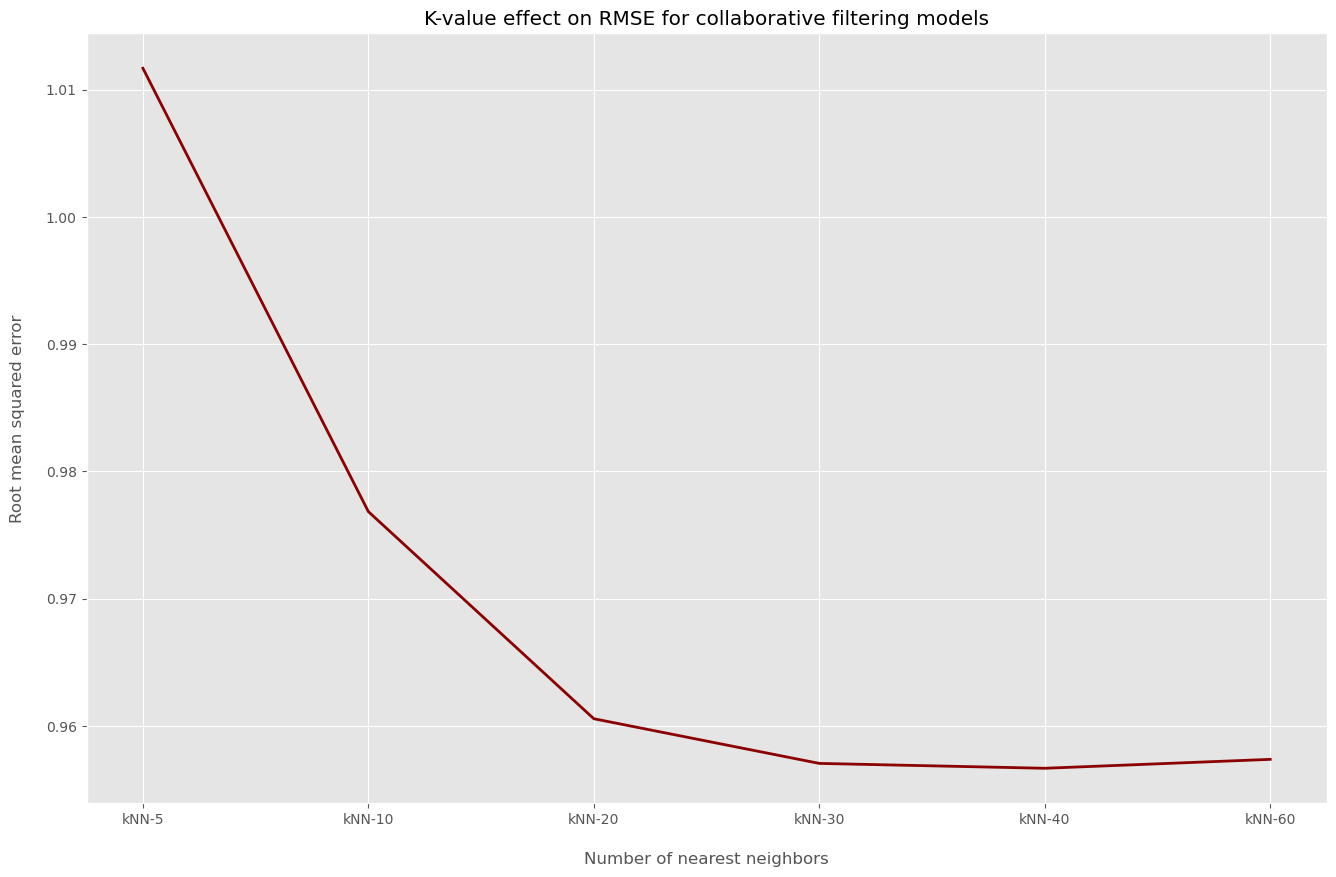

In [97]:
# KNN 시각화
fig7, ax7 = plt.subplots()
ax7.plot(RMSE_CF_df.Model, RMSE_CF_df.RMSE, label="RMSE", color='darkred', linewidth=2)
plt.xlabel("Number of nearest neighbors", labelpad=18)
plt.ylabel("Root mean squared error", labelpad=15)
plt.title("K-value effect on RMSE for collaborative filtering models")
fig7.set_figheight(10)
fig7.set_figwidth(16)
plt.show()

In [103]:
# Rerunning the best model so far (kNN-40) and storing the prediction results
best_CF_model = []
RMSE_best_CF = []

# Training the models and predicting for the users and movies in the validation data
CF_predictions = []

# For every movie in the validation data
for index, row in x_val.iterrows():
    # If that movie is in the training data
    if row["movieId"] in x_train["movieId"].unique():
        # Extract all user ID's for users who have rated the movie
        users_rated_movie = x_train.loc[x_train['movieId'] == row['movieId'], 'userId']
        # Sort these users by similarity (Pearson distance)
        users_sorted = (user_dist_matrix.loc[row['userId'], users_rated_movie].sort_values())
        # Select the nearest neighbours
        nearest_neighbours = users_sorted[:40]
        # Extract the nearest neighbours' ratings data
        nn_data = train_df.loc[train_df['userId'].isin(nearest_neighbours.index.to_list())]
        # Calculate the weighted average of the nearest neighbours' ratings
        nearest_neighbours_avg_rating = np.average(nn_data.loc[train_df['movieId'] == row['movieId'], 'rating'],
                                                   axis=0, weights=(1/nearest_neighbours))
    else:
        # There is a small chance that a few movies in the validation set might not appear in the training set.
        # I therefore predict that the user will rate these movies with the average rating for all movies
        nearest_neighbours_avg_rating = 4   # Must be changed!

    # Appending the prediction to the list of predictions
    if not np.isnan(nearest_neighbours_avg_rating):
        CF_predictions.append(nearest_neighbours_avg_rating)
    else:
        CF_predictions.append(4)

In [104]:
CF_predictions

[3.3664553821917917,
 4.001669121142661,
 2.52360479724979,
 3.873079245810143,
 2.0503357423367707,
 4.156927826220149,
 4.298747301555372,
 3.723591657840321,
 4.126511490895244,
 4.453634215696208,
 3.083757770293366,
 3.822213450399256,
 3.4232869562940462,
 3.6507078027726996,
 3.4239525810278932,
 3.2754890831176677,
 3.8957542259399585,
 3.6514050976135355,
 3.6979910183820373,
 3.7258524558707995,
 2.4414618423762886,
 3.6286178752935814,
 3.410479197691728,
 3.8743499391255227,
 3.7200216145549625,
 3.5747041528772083,
 3.49965351466765,
 4.073641558683879,
 3.7488043069948613,
 3.149379872467979,
 3.873794668376092,
 3.199109571399899,
 3.7485720067202695,
 2.9992745221152957,
 3.1755000284061823,
 3.904630764432361,
 2.0367821117452625,
 3.3752781831961585,
 3.6017589512554626,
 3.6528372863048166,
 1.6721313400931417,
 3.8751418965461877,
 3.4004491552699574,
 4.051629658756488,
 3.0482078827099235,
 4.100292945811245,
 3.6018529065196403,
 3.9977135649975684,
 4.1239257271

#### Hybrid

In [105]:
# Extracting the validation prediction from the CBF dataframe containing all predictions
CBF_predictions = []
for index, row in x_val.iterrows():
    user_predictions = CBF_model.loc[row["userId"], row["movieId"]]
    CBF_predictions.append(user_predictions)
    

# Calculating the predictions for the different hybrid "models": different weighted averages of CF and CBF filtering
print("RMSE combined approach (Lasso and KNN-40):")
weighted_avgs = [(0.5, 0.5), (0.45, 0.55), (0.4, 0.6), (0.35, 0.65), (0.3, 0.7), (0.25, 0.75), (0.20, 0.80)]
  
for weight in weighted_avgs:
    combined_predictions = np.array([y_pred * weight[0] for y_pred in np.array(CBF_predictions)]) + np.array([y_pred * weight[1] for y_pred in np.array(CF_predictions)])
    print(f"RMSE for combined approach with CBF weighted {weight[0]} and CF weighted {weight[1]}: \n",
          sqrt(mean_squared_error(y_val, combined_predictions)), "\n")

RMSE combined approach (Lasso and KNN-40):
RMSE for combined approach with CBF weighted 0.5 and CF weighted 0.5: 
 0.9376837132846262 

RMSE for combined approach with CBF weighted 0.45 and CF weighted 0.55: 
 0.933875329090002 

RMSE for combined approach with CBF weighted 0.4 and CF weighted 0.6: 
 0.9313317985918178 

RMSE for combined approach with CBF weighted 0.35 and CF weighted 0.65: 
 0.9300634991844254 

RMSE for combined approach with CBF weighted 0.3 and CF weighted 0.7: 
 0.9300756477962859 

RMSE for combined approach with CBF weighted 0.25 and CF weighted 0.75: 
 0.9313681943215478 

RMSE for combined approach with CBF weighted 0.2 and CF weighted 0.8: 
 0.9339358226481497 



- CBF weighted 0.35 and CF weighted 0.65 성능이 전체적으로 안좋지만 일단 가장 좋은거로 시도

In [109]:
# Building the hybrid recommender: Collaborative Filtering
CF_predictions_test = []
for index, row in x_test.iterrows():
    if row["movieId"] in x_train["movieId"].unique():
        users_rated_movie = x_train.loc[x_train['movieId'] == row['movieId'], 'userId']
        users_sorted = (user_dist_matrix.loc[row['userId'], users_rated_movie].sort_values())
        n_neighbours = users_sorted[:40]
        nn_data = train_df.loc[train_df['userId'].isin(n_neighbours.index.to_list())]
        nearest_neighbours_avg_rating = np.average(nn_data.loc[train_df['movieId'] == row['movieId'], 'rating'],
                                                   axis=0, weights=(1/n_neighbours))
    else:
        nearest_neighbours_avg_rating = train_df["rating"].mean()

    # appending the prediction to the list
    if not np.isnan(nearest_neighbours_avg_rating):
        CF_predictions_test.append(nearest_neighbours_avg_rating)
    else:
        CF_predictions_test.append(4)

print("RMSE KNN_40:", sqrt(mean_squared_error(y_test, CF_predictions_test)))

RMSE KNN_40: 0.95454706228669


In [112]:
# Building the hybrid recommender: Content-Based filtering
# Extracting the predictions for the movies and users in the test data
# from the CBF dataframe (which contains predictions for all movies and all users)
CBF_predictions_test = []
for index, row in x_test.iterrows():
    user_predictions = CBF_model.loc[row["userId"], row["movieId"]]
    CBF_predictions_test.append(user_predictions)

print("RMSE Lasso:", sqrt(mean_squared_error(y_test, CBF_predictions_test)))

RMSE Lasso: 1.0354950143612567


In [113]:
# Calculating the hybrid recommendations
hybrid_predictions_test = (np.array([y_pred * 0.35 for y_pred in np.array(CBF_predictions_test)]) 
                           + np.array([y_pred * 0.65 for y_pred in np.array(CF_predictions_test)]))

# Displaying the test results from training the Hybrid Recommender on test data
print(f"RMSE hybrid recommendations (test data): {sqrt(mean_squared_error(y_test, hybrid_predictions_test))} ")

RMSE hybrid recommendations (test data): 0.926981409381238 


### Surprise 활용한 KNN_basic + SVD 모델 생성

In [1]:
import pandas as pd
import numpy as np
from utils import Dataloader
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import RandomizedSearchCV

# 다시 데이터로드
path = 'data'
movies_df = Dataloader.load_movies(path)
ratings_df = Dataloader.load_ratings(path)
users_df = Dataloader.load_users(path)

# Surprise 라이브러리를 사용하기 위해 데이터 포맷 변환
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Train-test 분할
trainset, testset = train_test_split(data, test_size=0.2)

In [2]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   userId     1000209 non-null  int64
 1   movieId    1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [3]:
ratings_df

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
np.mean(ratings_df['userId'])

3024.512347919285

In [5]:
# 예를 들어, 훈련 데이터의 사용자 수와 아이템 수를 출력해보겠습니다.
num_users = trainset.n_users
num_items = trainset.n_items
print("Number of users:", num_users)
print("Number of items:", num_items)

# 특정 사용자 및 아이템에 대한 내부 인덱스 확인
original_user_id = 1  # 예시 사용자 ID
original_movie_id = 1  # 예시 영화 ID
internal_user_id = trainset.to_inner_uid(original_user_id)
internal_movie_id = trainset.to_inner_iid(original_movie_id)
print("Original user ID:", original_user_id)
print("Internal user ID:", internal_user_id)
print("Original movie ID:", original_movie_id)
print("Internal movie ID:", internal_movie_id)

Number of users: 6040
Number of items: 3674
Original user ID: 1
Internal user ID: 5253
Original movie ID: 1
Internal movie ID: 404


#### 베이스 성능(파라미터X)

In [6]:
# Collaborative Filtering 알고리즘 생성
svd = SVD()

# Item-based Collaborative Filtering 알고리즘 생성
knn = KNNBasic(sim_options={'user_based': False})

svd.fit(trainset)
knn.fit(trainset)

base_svd_predictions = svd.test(testset)
base_svd_predictions_df = pd.DataFrame(base_svd_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

base_knn_predictions = knn.test(testset)
base_knn_predictions_df = pd.DataFrame(base_knn_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])

Computing the msd similarity matrix...
Done computing similarity matrix.


In [7]:
from surprise import accuracy

# Calculate RMSE for SVD predictions
svd_rmse = accuracy.rmse(base_svd_predictions)

# Calculate RMSE for KNN predictions
knn_rmse = accuracy.rmse(base_knn_predictions)

print("RMSE for SVD:", svd_rmse)
print("RMSE for KNN:", knn_rmse)

RMSE: 0.8718
RMSE: 0.9106
RMSE for SVD: 0.8718295919116216
RMSE for KNN: 0.9105753912717318


#### 랜덤서치 수행

- 1번째 svd 랜덤서치
SVD Best RMSE Score: 0.8666646309281932
SVD Best Params: {'n_factors': 150, 'n_epochs': 50, 'lr_all': 0.003, 'reg_all': 0.05}

In [10]:
# Collaborative Filtering 알고리즘 생성
svd = SVD()

# SVD 모델의 파라미터 분포
param_dist_svd = {
    'n_factors': [200, 250, 300, 350],
    'n_epochs': [70, 80, 90, 100, 110],
    'lr_all': [ 0.006, 0.007, 0.008, 0.009, 0.01],
    'reg_all': [0.04, 0.05, 0.06, 0.07, 0.08]
}

# 랜덤 서치 객체 생성(defalut : n_iter=10 -> 10가지 방법)
rs_svd = RandomizedSearchCV(SVD, param_dist_svd, measures=['rmse'], cv=5, n_iter=20)

# 랜덤 서치 수행
rs_svd.fit(data)

# 최적의 파라미터와 성능 출력
print("SVD Best RMSE Score:", rs_svd.best_score['rmse'])
print("SVD Best Params:", rs_svd.best_params['rmse'])

SVD Best RMSE Score: 0.8504540883035935
SVD Best Params: {'n_factors': 250, 'n_epochs': 80, 'lr_all': 0.006, 'reg_all': 0.06}


- 1번째 SVD 랜덤서치
SVD Best RMSE Score: 0.8635078272017521
SVD Best Params: {'n_factors': 250, 'n_epochs': 60, 'lr_all': 0.008, 'reg_all': 0.05}

- 2번째 SVD 랜덤서치
SVD Best RMSE Score: 0.8509599882369556
SVD Best Params: {'n_factors': 250, 'n_epochs': 80, 'lr_all': 0.007, 'reg_all': 0.06}

- 3번째 SVD 랜덤서치
SVD Best RMSE Score: 0.8504540883035935
SVD Best Params: {'n_factors': 250, 'n_epochs': 80, 'lr_all': 0.006, 'reg_all': 0.06}

In [21]:
# KNNBasic만 다시 성능이 어째 기본보다 떨어지는거야...
# Item-based Collaborative Filtering 알고리즘 생성
knn = KNNBasic(sim_options={'user_based': False})

param_dist_knn = {
    'k': [50, 60, 70, 80, 90],
    'min_k': [1, 2, 3, 4, 5],
    'sim_options': {
        'name': ['cosine', 'pearson', 'MSD'], # Default 'MSD'
    }
}

rs_knn = RandomizedSearchCV(KNNBasic, param_dist_knn, measures=['rmse'], cv=3, n_iter=20)

rs_knn.fit(data)

print("KNN Best RMSE Score:", rs_knn.best_score['rmse'])
print("KNN Best Params:", rs_knn.best_params['rmse'])

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

- 1번째 knn 랜덤서치
KNN Best RMSE Score: 0.9293730847408367
KNN Best Params: {'k': 60, 'min_k': 2}

- 2번째 knn 랜덤서치
KNN Best RMSE Score: 0.929653256545156
KNN Best Params: {'k': 60, 'min_k': 2}

- 3번째 knn 랜덤서치 음.. 한번 돌리는데 거진 40분씩 걸리는데 이게 맞나... 랜덤서치로 돌리면 cv해서 총 30번정도인데..
KNN Best RMSE Score: 0.9309739503382883
KNN Best Params: {'k': 40, 'min_k': 4, 'sim_options': {'name': 'MSD', 'user_based': True}}

- 4번째 knn 랜덤서치
KNN Best RMSE Score: 0.929455070953137
KNN Best Params: {'k': 50, 'min_k': 2, 'sim_options': {'name': 'MSD', 'user_based': True}}

- 5번째 knn 랜덤서치
KNN Best RMSE Score: 0.9298023696094796
KNN Best Params: {'k': 60, 'min_k': 4, 'sim_options': {'name': 'MSD', 'user_based': False}}

#### KNN 0.92선을 못벗어나고있다... ㅜㅜ 일단 합쳐보자!

SVD Best Params: {'n_factors': 250, 'n_epochs': 80, 'lr_all': 0.006, 'reg_all': 0.06}
KNN Best Params: {'k': 60, 'min_k': 2}

In [11]:
from joblib import dump, load

# 잠재요인 Collaborative Filtering 알고리즘 생성
svd = SVD(n_factors=250, n_epochs=80, lr_all=0.006, reg_all=0.06)
svd.fit(trainset)
svd_predictions = svd.test(testset)
svd_predictions_df = pd.DataFrame(svd_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
dump(svd_predictions_df, 'svd_model.joblib')

# # 아이템기반 Collaborative Filtering 알고리즘 생성
# knn = KNNBasic(k=60, min_k=2)
# knn.fit(trainset)
# knn_predictions = knn.test(testset)
# knn_predictions_df = pd.DataFrame(knn_predictions, columns=['uid', 'iid', 'r_ui', 'est', 'details'])
# dump(knn_predictions_df, 'knn_model.joblib')

['svd_model.joblib']

In [8]:
from joblib import dump, load

svd_predictions_df = load('hybrid_models/svd_model.joblib')
knn_predictions_df = load('hybrid_models/knn_model.joblib')

In [12]:
from surprise import accuracy

# Calculate RMSE for SVD predictions
svd_rmse = accuracy.rmse(svd_predictions)

# # Calculate RMSE for KNN predictions
# knn_rmse = accuracy.rmse(knn_predictions)

print("RMSE for SVD:", svd_rmse)
# print("RMSE for KNN:", knn_rmse)

RMSE: 0.8514
RMSE for SVD: 0.8513567890798098


In [51]:
# 두 알고리즘의 예측 값을 가중 평균하여 추천 리스트 생성
hybrid_preds = (base_svd_predictions_df['est'] + base_knn_predictions_df['est']) / 2

# 실제 값과 예측 값 간의 차이 계산
hybrid_errors = hybrid_preds - svd_predictions_df['r_ui'].values

# 직접 수식 계산... surprise의 accuracy의 경우 혼합모델의 평가로는 사용 불가능하다.
rmse = np.sqrt(np.mean(hybrid_errors ** 2))

print("Hybrid Model RMSE:", rmse)

Hybrid Model RMSE: 0.874425756242279


#### Hybrid 성능평가
- 0.5/0.5 평균기준

In [11]:
from joblib import dump, load

def hybrid_model_loader():

    # SVD모델 불러오기
    svd_predictions_df = load('hybrid_models/svd_model.joblib')

    # KNN모델 불러오기
    knn_predictions_df = load('hybrid_models/knn_model.joblib')
    
    return svd_predictions_df, knn_predictions_df

In [12]:
svd_predictions_df, knn_predictions_df = hybrid_model_loader()

# 두 알고리즘의 예측 값을 가중 평균하여 추천 리스트 생성
hybrid_preds = (svd_predictions_df['est'] + knn_predictions_df['est']) / 2

# 실제 값과 예측 값 간의 차이 계산
hybrid_errors = hybrid_preds - svd_predictions_df['r_ui'].values

# 직접 수식 계산... surprise의 accuracy의 경우 혼합모델의 평가로는 사용 불가능하다.
rmse = np.sqrt(np.mean(hybrid_errors ** 2))

print("Hybrid Model RMSE:", rmse)

Hybrid Model RMSE: 0.8733052089001966


In [13]:
weight_svd = 0.7  # SVD 모델의 가중치
weight_knn = 0.3  # KNN 모델의 가중치

hybrid_preds = (weight_svd * svd_predictions_df['est']) + (weight_knn * knn_predictions_df['est'])

hybrid_errors = hybrid_preds - svd_predictions_df['r_ui'].values
rmse = np.sqrt(np.mean(hybrid_errors ** 2))

print("Hybrid Model RMSE:", rmse)

Hybrid Model RMSE: 0.8625743788916883


- 하나만 쓰는게 rmse성능으로는 더 뛰어나지만 서로 다른방식으로 구해진것에서 조금 다르다고 느껴 0.7:0.3정도로 나누기로 결정

In [16]:
weight_svd = 0.1  # SVD 모델의 가중치
weight_knn = 0.9  # KNN 모델의 가중치

test_hybrid_preds = (weight_svd * svd_predictions_df['est']) + (weight_knn * knn_predictions_df['est'])

test_hybrid_errors = test_hybrid_preds - svd_predictions_df['r_ui'].values
rmse = np.sqrt(np.mean(test_hybrid_errors ** 2))

print("Hybrid Model RMSE:", rmse)

Hybrid Model RMSE: 1.2013039206518912


In [45]:
weight_svd = 0.7  # SVD 모델의 가중치
weight_knn = 0.3  # KNN 모델의 가중치

hybrid_preds = (weight_svd * svd_predictions_df['est']) + (weight_knn * knn_predictions_df['est'])

hybrid_errors = hybrid_preds - svd_predictions_df['r_ui'].values
rmse = np.sqrt(np.mean(hybrid_errors ** 2))

print("Hybrid Model RMSE:", rmse)

Hybrid Model RMSE: 0.8623681329481969


#### 함수화 적용

In [20]:
from joblib import dump, load

def hybrid_model_loader():

    # SVD모델 불러오기
    svd_predictions_df = load('hybrid_models/svd_model.joblib')

    # KNN모델 불러오기
    knn_predictions_df = load('hybrid_models/knn_model.joblib')
    
    return svd_predictions_df, knn_predictions_df

# Weighted Hybrid 추천 생성
def hybrid_recommendation(user_id):
    
    # 모델 loader
    svd_predictions_df, knn_predictions_df = hybrid_model_loader()

    svd_user_preds = svd_predictions_df[svd_predictions_df['uid'] == user_id]
    knn_user_preds = knn_predictions_df[knn_predictions_df['uid'] == user_id]

    # 두 알고리즘의 예측 값을 가중 평균하여 추천 리스트 생성
    weight_svd = 0.7  # SVD 모델의 가중치
    weight_knn = 0.3  # KNN 모델의 가중치

    hybrid_preds = (weight_svd * svd_user_preds['est']) + (weight_knn * knn_user_preds['est'])

    # 사용자가 이미 본 영화 제외
    user_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()
    hybrid_preds = hybrid_preds[~hybrid_preds.index.isin(user_movies)]

    # 가장 높은 가중 평균 예측 값을 가진 영화 순으로 정렬하여 추천
    hybrid_recommendations = hybrid_preds.sort_values(ascending=False).index.tolist()

    return hybrid_recommendations

# 간단한 추천 함수
def recommend_user_to_movie(userId):
    
    loaded_svd, loaded_knn = hybrid_model_loader()

    # 특정 사용자에게 추천
    user_id_to_recommend = userId  # 원하는 사용자 ID 입력
    recommendations = hybrid_recommendation(user_id_to_recommend)

    # 영화 ID와 영화 제목을 매핑하는 딕셔너리 생성
    movie_id_to_title = dict(zip(movies_df['movieId'], movies_df['title']))

    # 추천된 영화 ID들을 실제 영화 데이터에서 영화 제목으로 변환
    recommended_movie_titles = [movie_id_to_title[ratings_df.loc[movie_idx]['movieId']] for movie_idx in recommendations]

    print("Recommended movies for User {}: ".format(user_id_to_recommend))
    for movie_title in recommended_movie_titles[:5]:
        print(movie_title)

In [21]:
recommend_user_to_movie(1)

Recommended movies for User 1: 
Ghost in the Shell (Kokaku kidotai) (1995)
Rocky (1976)
Blood Simple (1984)
Election (1999)
Dave (1993)


#### Recall, Precision 적용해보기

In [14]:
from collections import defaultdict

from surprise import Dataset, SVD
from surprise.model_selection import KFold

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

#### 베이스 테스트용

In [16]:
# 모델 예측 결과를 하나의 리스트로 병합
hybrid_predictions = []

for (svd_idx, svd_pred), (knn_idx, knn_pred) in zip(base_svd_predictions_df.iterrows(), base_knn_predictions_df.iterrows()):
    hybrid_pred = svd_pred['est'] * 0.7 + knn_pred['est'] * 0.3  # 가중치 적용
    hybrid_predictions.append((svd_pred['uid'], svd_pred['iid'], svd_pred['r_ui'], hybrid_pred, svd_pred['details']))

# Precision@K와 Recall@K 계산
precisions, recalls = precision_recall_at_k(hybrid_predictions, k=10, threshold=3.5)

# Precision과 Recall 평균 계산
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print("Average Precision@10:", avg_precision)
print("Average Recall@10:", avg_recall)

Average Precision@10: 0.7828258806145258
Average Recall@10: 0.5487495200981244


In [17]:
svd_predictions_list = base_svd_predictions_df.values.tolist()

# Precision@K와 Recall@K 계산
svd_precisions, svd_recalls = precision_recall_at_k(svd_predictions_list, k=10, threshold=3.5)

# Precision과 Recall 평균 계산
svd_avg_precision = sum(prec for prec in svd_precisions.values()) / len(svd_precisions)
svd_avg_recall = sum(rec for rec in svd_recalls.values()) / len(svd_recalls)

print("Average Precision@5(svd):", svd_avg_precision)
print("Average Recall@5(svd):", svd_avg_recall)

Average Precision@5(svd): 0.7856611083503665
Average Recall@5(svd): 0.5423621788800919


In [19]:
knn_predictions_list = base_knn_predictions_df.values.tolist()

# Precision@K와 Recall@K 계산
knn_precisions, knn_recalls = precision_recall_at_k(knn_predictions_list, k=10, threshold=3.5)

# Precision과 Recall 평균 계산
knn_avg_precision = sum(prec for prec in knn_precisions.values()) / len(knn_precisions)
knn_avg_recall = sum(rec for rec in knn_recalls.values()) / len(knn_recalls)

print("Average Precision@10(knn):", knn_avg_precision)
print("Average Recall@10(knn):", knn_avg_recall)

Average Precision@10(knn): 0.7303124778153854
Average Recall@10(knn): 0.5381218557059554


#### 각 모델 성능평가

In [9]:
svd_predictions_df,knn_predictions_df = hybrid_model_loader()

In [49]:
# 모델 예측 결과를 하나의 리스트로 병합
hybrid_predictions = []

for (svd_idx, svd_pred), (knn_idx, knn_pred) in zip(svd_predictions_df.iterrows(), knn_predictions_df.iterrows()):
    hybrid_pred = svd_pred['est'] * 0.7 + knn_pred['est'] * 0.3  # 가중치 적용
    hybrid_predictions.append((svd_pred['uid'], svd_pred['iid'], svd_pred['r_ui'], hybrid_pred, svd_pred['details']))

# Precision@K와 Recall@K 계산
precisions, recalls = precision_recall_at_k(hybrid_predictions, k=5, threshold=3.5)

# Precision과 Recall 평균 계산
avg_precision = sum(prec for prec in precisions.values()) / len(precisions)
avg_recall = sum(rec for rec in recalls.values()) / len(recalls)

print("Average Precision@5:", avg_precision)
print("Average Recall@5:", avg_recall)

Average Precision@5: 0.8246271130262084
Average Recall@5: 0.4016615213325104


In [47]:
svd_predictions_list = svd_predictions_df.values.tolist()

# Precision@K와 Recall@K 계산
svd_precisions, svd_recalls = precision_recall_at_k(svd_predictions_list, k=5, threshold=3.5)

# Precision과 Recall 평균 계산
svd_avg_precision = sum(prec for prec in svd_precisions.values()) / len(svd_precisions)
svd_avg_recall = sum(rec for rec in svd_recalls.values()) / len(svd_recalls)

print("Average Precision@5(svd):", svd_avg_precision)
print("Average Recall@5(svd):", svd_avg_recall)

Average Precision@5(svd): 0.8207988067617072
Average Recall@5(svd): 0.3917817663704599


In [48]:
knn_predictions_list = knn_predictions_df.values.tolist()

# Precision@K와 Recall@K 계산
knn_precisions, knn_recalls = precision_recall_at_k(knn_predictions_list, k=5, threshold=3.5)

# Precision과 Recall 평균 계산
knn_avg_precision = sum(prec for prec in knn_precisions.values()) / len(knn_precisions)
knn_avg_recall = sum(rec for rec in knn_recalls.values()) / len(knn_recalls)

print("Average Precision@5(knn):", knn_avg_precision)
print("Average Recall@5(knn):", knn_avg_recall)

Average Precision@5(knn): 0.8036819136007287
Average Recall@5(knn): 0.4044180736801331


### LightFM 사용해보기

In [ ]:
from lightfm import LightFM
from lightfm.datasets import fetch_movielens
from lightfm.evaluation import precision_at_k

# Load the MovieLens 100k dataset. Only five
# star ratings are treated as positive.
data = fetch_movielens(min_rating=5.0)

# Instantiate and train the model
model = LightFM(loss='warp')
model.fit(data['train'], epochs=30, num_threads=2)

# Evaluate the trained model
test_precision = precision_at_k(model, data['test'], k=5).mean()